# YOLO test

In [47]:
%pwd

'c:\\Users\\USER\\bomishot\\Solving_ReCAPTCHA_v2_Challenge_with_ViT\\Python Code'

In [48]:
!pip install torch torchvision
!git clone https://github.com/ultralytics/yolov5
!pip install -U -r yolov5/requirements.txt

Cloning into 'yolov5'...


^C


In [ ]:
%cd /content/yolov5
!pip install -r requirements.txt

In [ ]:
!cd yolov5; python detect.py --weights yolov5l.pt --source "/content/drive/MyDrive/Kaggle/Input/Recaptcha_Dataset/images/Bicycle/Bicycle (2).png"


/bin/bash: line 1: cd: yolov5: No such file or directory
detect: weights=['yolov5l.pt'], source=/content/drive/MyDrive/Kaggle/Input/Recaptcha_Dataset/images/Bicycle/Bicycle (2).png, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=1, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-218-g9e97ac3 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5l summary: 367 layers, 46533693 parameters, 0 gradients
Detected: bicycle with confidence 0.46 at [tensor(35., device='cuda:0'), tensor(39., device='cuda:0'), tensor(59., device='cuda:0'), tensor(69., device='cuda:0')]
Detected: person with confidence 0.83 at [tensor(82., device='cuda:0'), ten

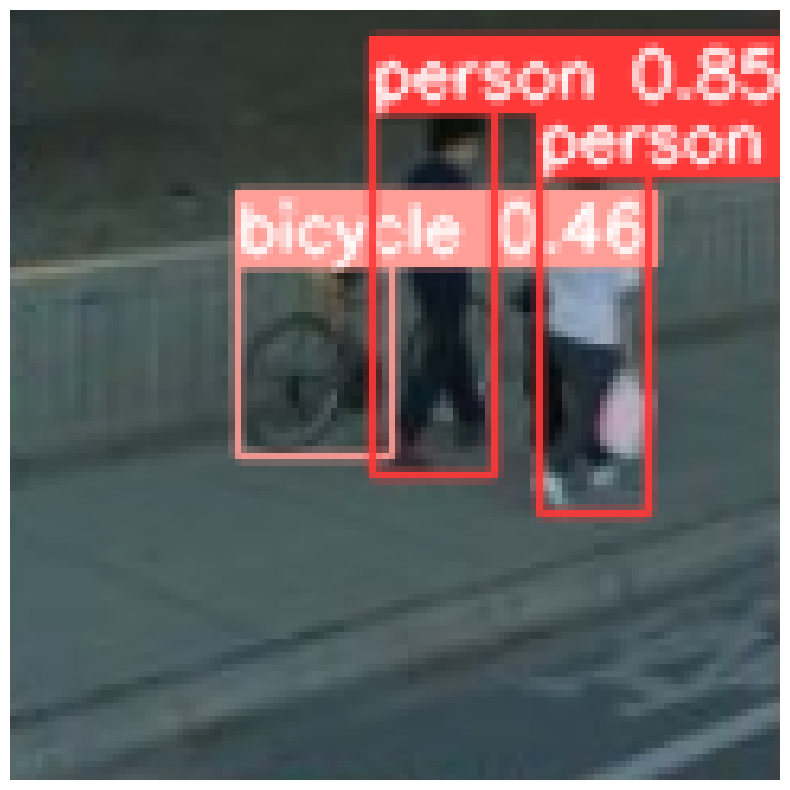

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 결과 이미지 경로 설정
result_img_path = '/content/yolov5/runs/detect/exp12/Bicycle (2).png'  # 경로는 실행마다 달라질 수 있으므로, 적절히 수정이 필요합니다.

# 이미지 로드
img = mpimg.imread(result_img_path)

# 이미지 표시
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.axis('off')  # 축 정보 제거
plt.show()


In [ ]:
import json

# JSON 파일 읽기
with open('/content/yolov5/detected_results.json', 'r') as f:
    data = json.load(f)

# 파일 이름을 기준으로 검출된 객체에 접근하기
file_name = "Bicycle (1)"
objects_in_file = data[file_name]

for obj in objects_in_file:
    label = obj['label']
    confidence = obj['confidence']
    bounding_box = obj['bounding_box']

    print(f"Label: {label}, Confidence: {confidence}, Bounding Box: {bounding_box}")


Label: fire hydrant, Confidence: 0.39, Bounding Box: [46.0, 32.0, 56.0, 55.0]
Label: car, Confidence: 0.70, Bounding Box: [0.0, 20.0, 16.0, 35.0]


bicycle 이미지 데이터셋에 대해, bicycle 클래스로 예측을 yolo가 하고 있는지 실행해보자.

In [ ]:
import json

def process_detection_for_class(class_name):
    # JSON 파일 로드
    with open("detected_results.json", "r") as file:
        results = json.load(file)

    count_detected_images = 0  # 특정 라벨을 감지한 이미지의 개수
    total_images = len(results)

    # 모든 검출의 confidence 점수들을 저장하기 위한 리스트
    all_confidence_scores = []

    # 결과 분석
    for image_name, detections in results.items():
        specific_detections = [det for det in detections if det['label'] == class_name]

        # 해당 이미지에서 특정 탐지가 있었다면
        if specific_detections:
            count_detected_images += 1
            for detection in specific_detections:
                all_confidence_scores.append(float(detection['confidence']))

    # 전체 검출의 confidence 점수 평균 계산
    average_confidence = sum(all_confidence_scores) / len(all_confidence_scores) if all_confidence_scores else 0

    return {
        "class_name": class_name,
        "total_images": total_images,
        "count_detected_images": count_detected_images,
        "detection_success_rate": count_detected_images / total_images * 100,
        "average_confidence": average_confidence
    }



coco.yaml과 내 데이터셋의 class가 겹치는 것이 6개이므로, 그것에 대해서만 검출해보자.
* Bicycle, Bus, Car, Motorcycle, Traffic Light, Hydrant

### Bicycle

In [ ]:
!python detect.py --weights yolov5l.pt --source '/content/drive/MyDrive/Kaggle/Input/Recaptcha_Dataset/images/Bicycle' --conf 0.3 --img-size 640

* yolo weight - small 결과 : 151개 감지
* yolo weight - large 결과  : 477개 감지
> large weight 사용하는 방향으로.

In [ ]:
bicycle_result = process_detection_for_class('bicycle')

> yolo weight - large test
* Bicycle
  * 780 image 중, 477개 검출

### Bus

In [ ]:
!python detect.py --weights yolov5l.pt --source '/content/drive/MyDrive/Kaggle/Input/Recaptcha_Dataset/images/Bus' --conf 0.3 --img-size 640


In [ ]:
bus_result = process_detection_for_class('bus')

### car

In [ ]:
!python detect.py --weights yolov5l.pt --source '/content/drive/MyDrive/Kaggle/Input/Recaptcha_Dataset/images/Car' --conf 0.3 --img-size 640

In [ ]:
car_result = process_detection_for_class('car')

### Motorcycle

In [ ]:
!python detect.py --weights yolov5l.pt --source '/content/drive/MyDrive/Kaggle/Input/Recaptcha_Dataset/images/Motorcycle' --conf 0.3 --img-size 640

In [ ]:
motorcycle_result = process_detection_for_class('motorcycle')

### Traffic Light

In [ ]:
!python detect.py --weights yolov5l.pt --source '/content/drive/MyDrive/Kaggle/Input/Recaptcha_Dataset/images/Traffic Light' --conf 0.3 --img-size 640

In [ ]:
traffic_light_result = process_detection_for_class('traffic light')

### Hydrant


In [ ]:
!python detect.py --weights yolov5l.pt --source '/content/drive/MyDrive/Kaggle/Input/Recaptcha_Dataset/images/Hydrant' --conf 0.3 --img-size 640

In [ ]:
fire_hydrant_result = process_detection_for_class('fire hydrant')

### 전체 결과 확인

In [ ]:
def print_class_results(result):
    """주어진 클래스의 결과를 출력합니다."""
    print(f"Class: {result['class_name']}")
    print(f"Total images: {result['total_images']}")
    print(f"Number of images with {result['class_name']} detections: {result['count_detected_images']}")
    print(f"Detection success rate: {result['detection_success_rate']:.2f}%")
    print(f"Average confidence score for {result['class_name']} detections: {result['average_confidence']:.2f}\n")
    print('-------------------------------------------------------')
# 모든 결과를 리스트에 저장
all_results = [bicycle_result, bus_result, car_result, motorcycle_result, traffic_light_result, fire_hydrant_result]

# 각 클래스의 결과 출력
for result in all_results:
    print_class_results(result)


Class: bicycle
Total images: 780
Number of images with bicycle detections: 477
Detection success rate: 61.15%
Average confidence score for bicycle detections: 0.63

-------------------------------------------------------
Class: bus
Total images: 1209
Number of images with bus detections: 417
Detection success rate: 34.49%
Average confidence score for bus detections: 0.66

-------------------------------------------------------
Class: car
Total images: 3496
Number of images with car detections: 2259
Detection success rate: 64.62%
Average confidence score for car detections: 0.59

-------------------------------------------------------
Class: motorcycle
Total images: 81
Number of images with motorcycle detections: 38
Detection success rate: 46.91%
Average confidence score for motorcycle detections: 0.57

-------------------------------------------------------
Class: traffic light
Total images: 791
Number of images with traffic light detections: 465
Detection success rate: 58.79%
Average 

In [ ]:
# 전체 평균 계산
total_detected = sum(result['count_detected_images'] for result in all_results)
total_images = all_results[0]['total_images']  # 모든 결과에서 이미지의 총 개수는 동일하므로 첫 번째 결과에서 가져옴
average_success_rate = total_detected / (total_images * len(all_results)) * 100
average_confidence = sum(result['average_confidence'] for result in all_results) / len(all_results)

# 전체 평균 출력
print(f"Total average detection success rate: {average_success_rate:.2f}%")
print(f"Total average confidence score: {average_confidence:.2f}")

Total average detection success rate: 94.40%
Total average confidence score: 0.64


* big image - yolo test 결과


| Class          | Total Images | Detected Images | Detection Success Rate | Average Confidence Score |
|----------------|--------------|-----------------|------------------------|--------------------------|
| bicycle        | 780          | 477             | 61.15%                 | 0.63                     |
| bus            | 1209         | 417             | 34.49%                 | 0.66                     |
| car            | 3496         | 2259            | 64.62%                 | 0.59                     |
| motorcycle     | 81           | 38              | 46.91%                 | 0.57                     |
| traffic light  | 791          | 465             | 58.79%                 | 0.64                     |
| fire hydrant   | 955          | 762             | 79.79%                 | 0.64                     |

* **Total average detection success rate :** 57%  
* **Total average confidence score :** 62%



## small image 에 대해서도 해보자.

In [ ]:
!python detect.py --weights yolov5l.pt --source '/content/drive/MyDrive/Kaggle/Input/Recaptcha_Dataset/small_images/Bicycle' --conf 0.3 --img-size 640

In [ ]:
bicycle_result = process_detection_for_class('bicycle')

In [ ]:
bicycle_result

{'class_name': 'bicycle',
 'total_images': 73,
 'count_detected_images': 0,
 'detection_success_rate': 0.0,
 'average_confidence': 0}

> 세부 영역(small image)에 대해서는 yolo로 탐지 아예 안됨.